
# Bike Sharing Demand   
#### Forecast use of a city bikeshare system



- casual, registered, count can't be used in feature becuase they do not exist in temp data.
- Use RMSLE(Root Mean Squared Logarithmic Error) metric.
- Use regretion to predict bike sharing demand.   


# EDA(Exploratory Data Analysis)

In [3]:
# Standard libraries
import pandas as pd
import numpy as np

# Visulization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats # probability distribution graph

# Use ggplot to see numbers in the graph more visible with a grid.
plt.style.use('ggplot')

In [4]:
# read train data
train = pd.read_csv('./../train.csv', parse_dates=['datetime']) # turn datetime column to datetime type.

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Check dimension of train data
train.shape

(10886, 12)

In [7]:
# Check column names of train data
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
# Check column type of train data
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [9]:
# Check column info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [10]:
# Check basic statistics of temp column in train data.
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [11]:
# Check basic statistics of all columns in train data.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
# Check null in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
# Check na in train data.
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

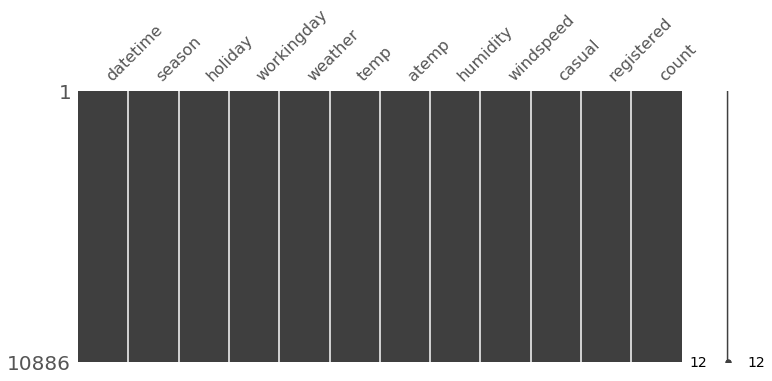

In [14]:
# Check null in chart.
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [15]:
# Split datetime data and add to train data
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [16]:
# Check added columns
train.shape

(10886, 18)

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


C:\Users\drasc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 0, 'second'), Text(0.5, 1.0, 'count by second')]

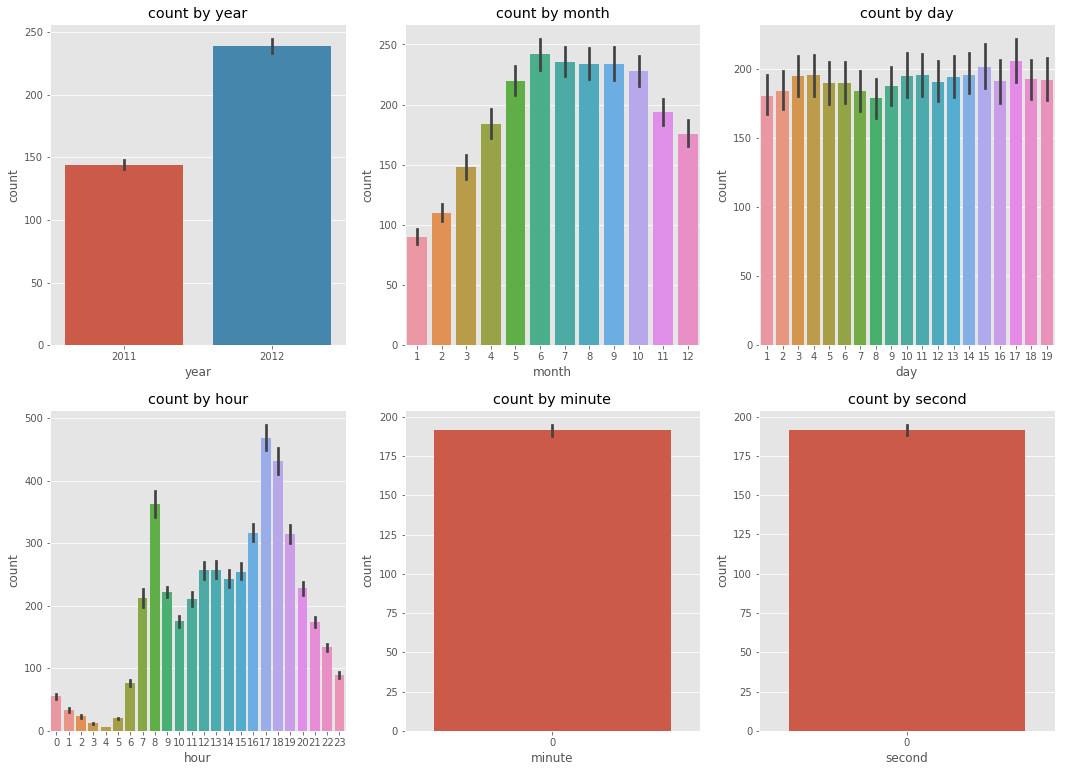

In [18]:
# Check count by year,month day, hour, minute, and second in bar graph
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 13)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)

sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(xlabel = 'year', title='count by year')
ax2.set(xlabel = 'month', title='count by month')
ax3.set(xlabel = 'day', title='count by day')

ax4.set(xlabel = 'hour', title='count by hour')
ax5.set(xlabel = 'minute', title='count by minute')
ax6.set(xlabel = 'second', title='count by second')


- There are more rentals by year in 2012 than 2011.
- The monthly rental volume is highest in June and the lowest in January. The rental volume is high in July-October. 
- The daily rental amount is only from the 1st to the 19th, and the rest of the days are in the test data. Therefore, it cannot be used as a feature.   
- Looking at the amount of rental by hour, it seems that the amount of rental is high during commuting time.
- It is necessary to distinguish between weekend and weekday
- Minutes and seconds are both 0, so they are meaningless.


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'workingday'),
 Text(0.5, 1.0, 'rental by workingday')]

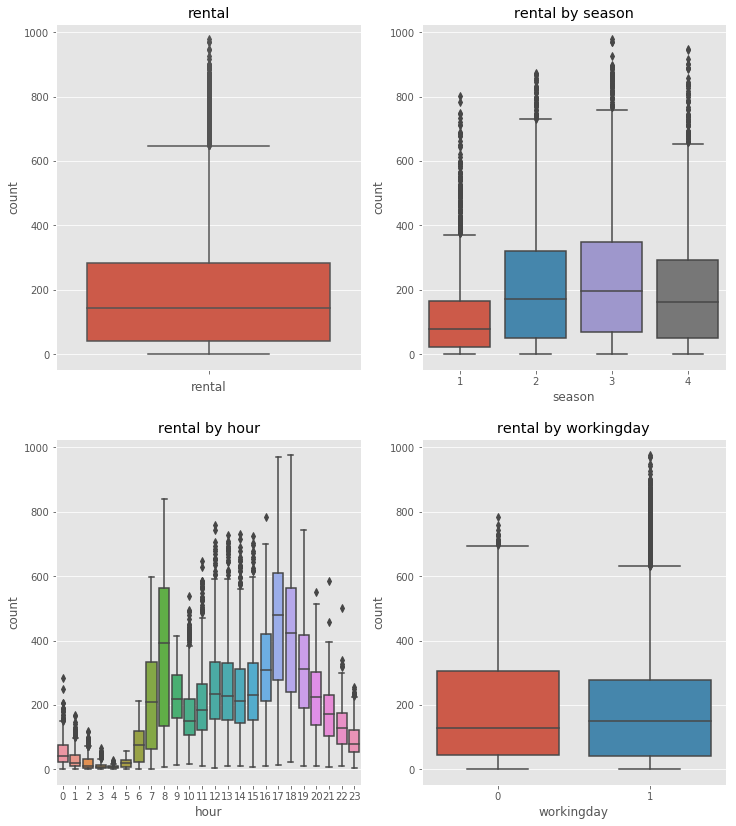

In [19]:
# Check count by count, season, hour and workingday by boxplot.
fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(12,14)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(xlabel = 'rental', title='rental')
axes[0][1].set(xlabel = 'season', ylabel='count', title='rental by season')
axes[1][0].set(xlabel = 'hour', ylabel='count', title='rental by hour')
axes[1][1].set(xlabel = 'workingday', ylabel='count', title='rental by workingday')

In [20]:
# Add day-of-week column
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [22]:
train['dayofweek'].value_counts()
    # 5 - Saturday

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

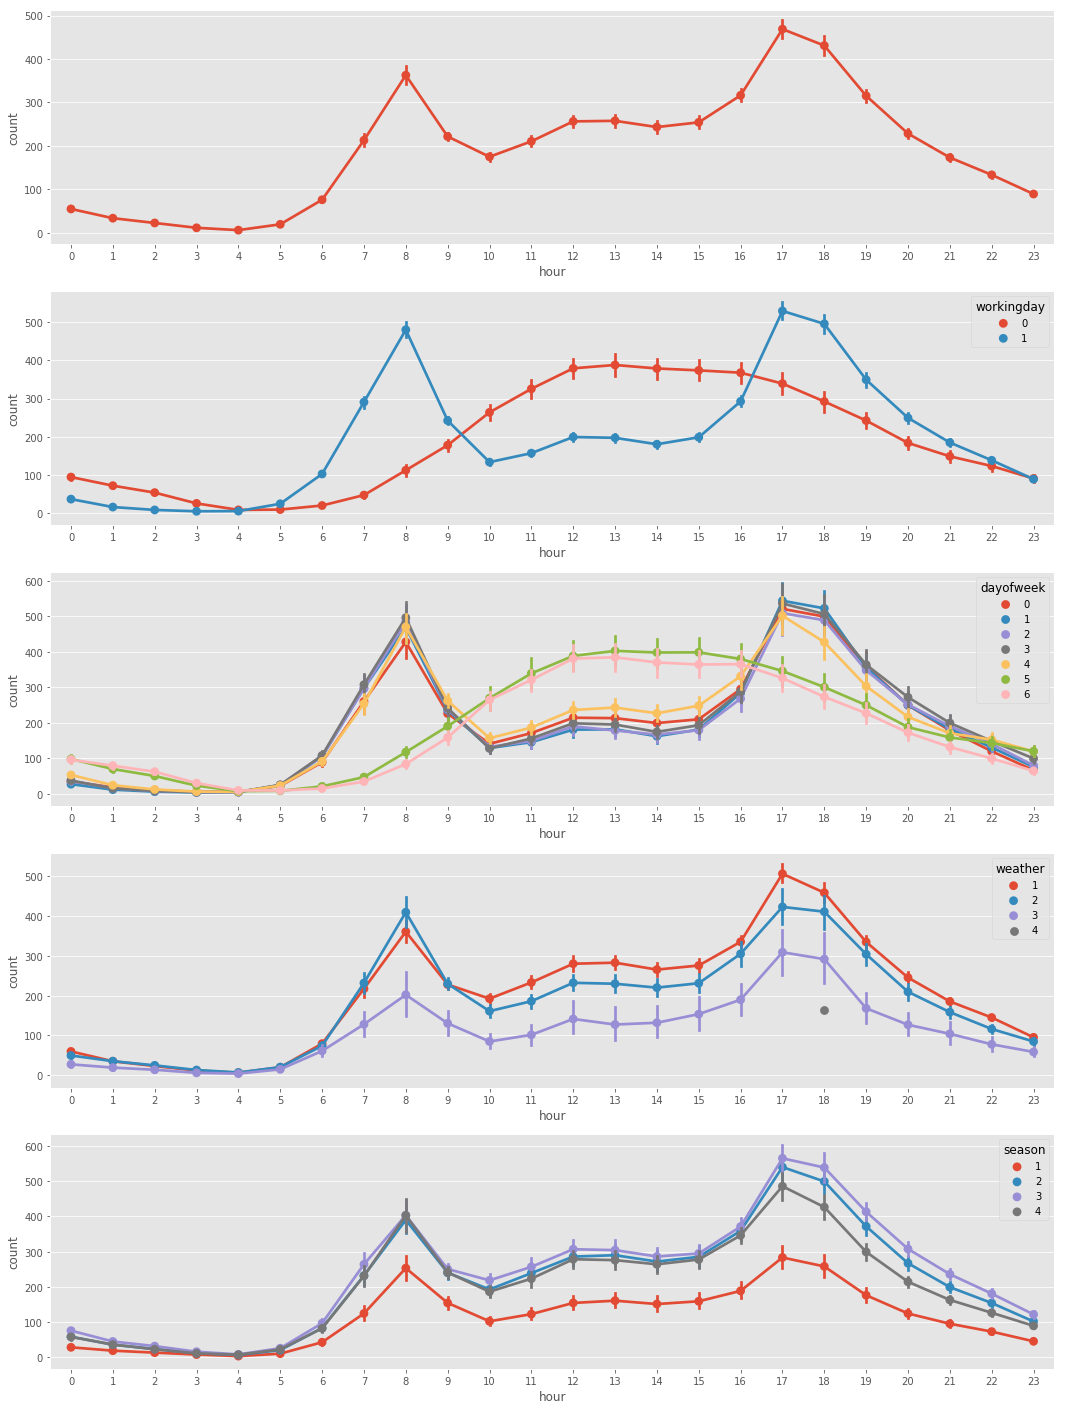

In [23]:
# Check the number of rentals by hour according to the working day, day of the week, weather, and season through a scatter plot.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [24]:
# Correlation coefficient of items not related to date
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

# Can't use casual and registered column because, they donn't exist in test data.

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


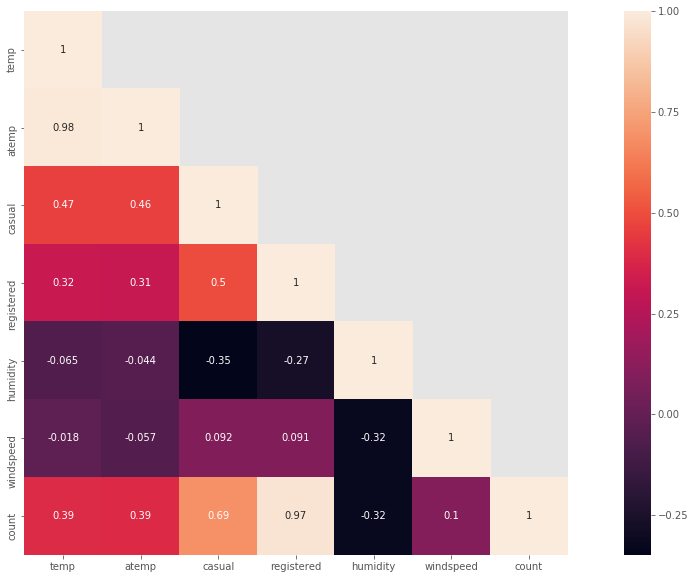

In [25]:
# Heat map of correlation coefficient
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False # Based on the value of 1 in the array, the upper part of the output is excluded.

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax = 1, square=True, annot=True) # vmax : vertical size

- Temperature, humidity, and wind speed have little correlation with count.
- The one most related to the count is the registered, but there is no such column in the test.
- Atemp and temp are 0.98, which is highly correlated, but may not be suitable for feature use due to multicollinearity problems.

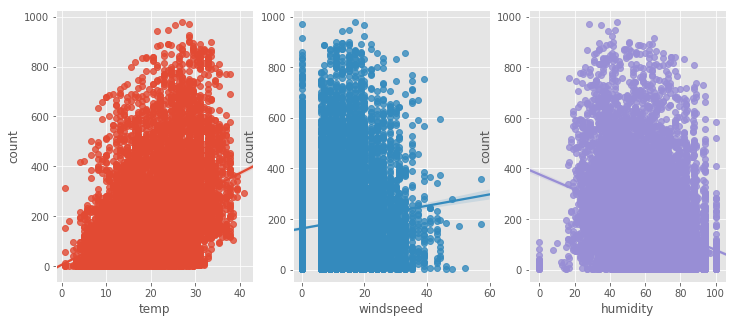

In [26]:
# Scatter plot according to temperature, wind speed and humidity
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(x = 'temp', y='count', data=train, ax=ax1)
sns.regplot(x = 'windspeed', y='count', data=train, ax=ax2)
sns.regplot(x = 'humidity', y='count', data=train, ax=ax3)

- In the case of wind speed, it is probably recorded as 0 for an unobserved value (missing value) as the numbers are clustered at 0.

In [27]:
# Add column to separate datetime by year and month
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

In [28]:
train['year_month'] = train['datetime'].apply(concatenate_year_month)
print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


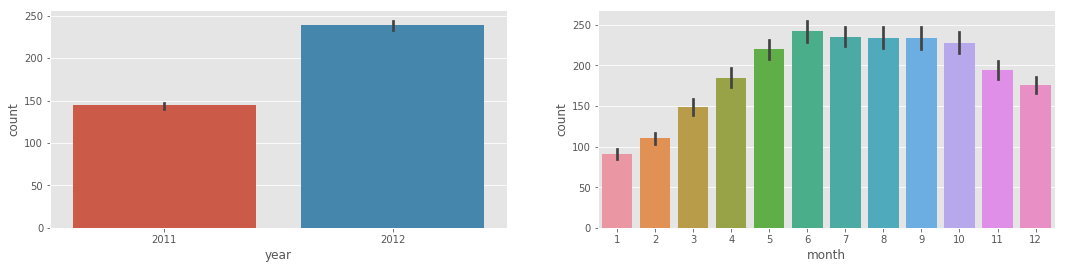

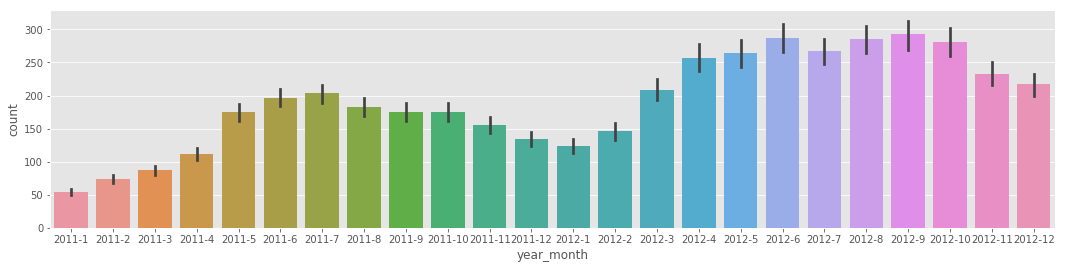

In [29]:
# Bar graphs by year, month, year and month
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- There are more rentals in 2012 than in 201.
- There are more rentals in summer than in winter.
- If you follow the monthly data for 2011 and 2012, the overall trend is increasing.

In [30]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


In [31]:
# Constructing a normal distribution by removing low fitting and over fitting from the train count
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean() <= (3 * train['count'].std()))]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([  1,   1,   1, ..., 732, 733, 734], dtype=int64)),
 (157.6468423658611, 183.00381786013588, 0.9455240333561122))

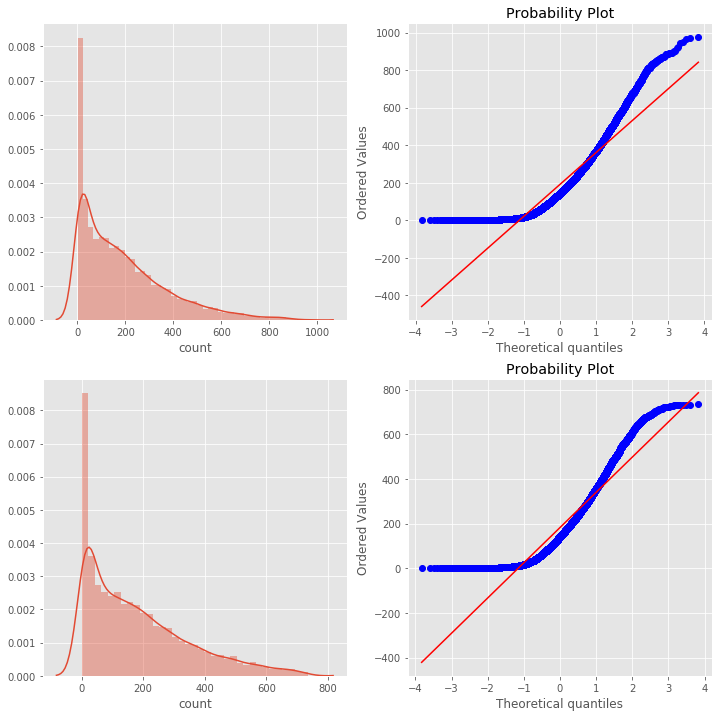

In [32]:
# Check the data distribution of count values
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,12)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit = True, plot=axes[0][1])

sns.distplot(trainWithoutOutliers['count'], ax=axes[1][0])
stats.probplot(trainWithoutOutliers['count'], dist='norm', fit = True, plot=axes[1][1])

    #  Check that it is not normalized

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542908, 4.523106928071492, 0.9537631807794263))

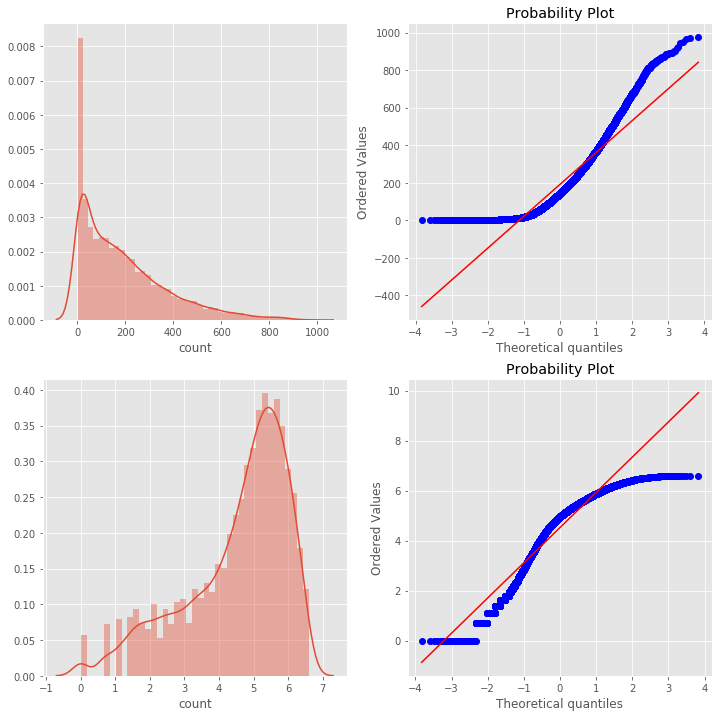

In [33]:
# Check the data distribution of count values
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,12)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit = True, plot=axes[0][1])

sns.distplot(np.log(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log(trainWithoutOutliers['count']), dist='norm', fit = True, plot=axes[1][1])
     # Standardize to a certain extent with logs

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

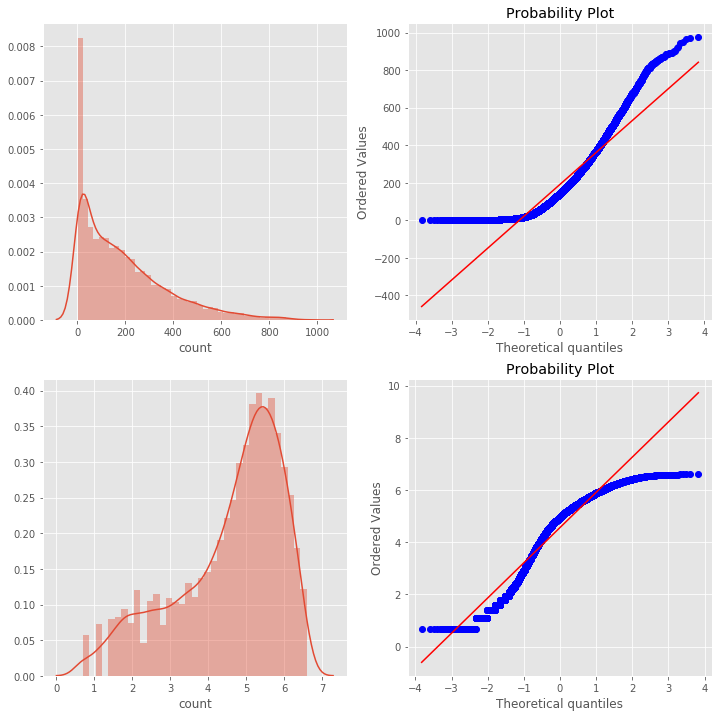

In [34]:
# Check the data distribution of count values
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,12)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit = True, plot=axes[0][1])

sns.distplot(np.log1p(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit = True, plot=axes[1][1])
     # Standardize to a certain extent with log1p.

In [35]:
train.describe()
    # There is a big difference between count and day. So we normalize it to log.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


- Even if the count variable is standardized, it is skewed to the right.
- Most machine learning achieves a normal distribution when the dependent variable is normal.
- As an alternative, even if the outlier data is removed and the count is changed by adding log, the normal distribution does not follow, but it is expressed in more detail than the previous graph.